In [21]:
import pandas as pd
import pyomo.environ as pyo
import networkx as nx
import matplotlib.pyplot as plt
import random
from random import sample

In [22]:
nodes = pd.read_pickle("../data/mock/mock_nodes.pkl")
channels = pd.read_pickle("../data/mock/mock_channels.pkl")

In [23]:
nodes.to_csv("../data/mock/mock_nodes.csv")
channels.to_csv("../data/mock/mock_channels.csv")

In [24]:
nodes

,alias,addresses,outgoing_channels,incoming_channels
pub_key,,,,
GPBGSG,GPBGSG.com,1,"[006439780006730216, 329544070038057061, 91468...","[INV006439780006730216, INV329544070038057061,..."
ZMAHVA,ZMAHVA.com,1,"[422771696583045183, 303549289660800317]","[INV422771696583045183, INV303549289660800317]"
ARFUZV,ARFUZV.com,1,"[466362424342743057, 258368889645855165, 98909...","[INV466362424342743057, INV258368889645855165,..."
ZVMBLR,ZVMBLR.com,1,"[388568654289184442, 957504866265573325, 23824...","[INV388568654289184442, INV957504866265573325,..."
SQURSN,SQURSN.com,1,"[827793713354708434, 575385006423269297]","[INV827793713354708434, INV575385006423269297]"
TMETCQ,TMETCQ.com,1,"[388568654289184442, 313991289014896473, 11546...","[INV388568654289184442, INV313991289014896473,..."
LRUSDV,LRUSDV.com,1,"[679107110191841667, 162738838273924784, 00695...","[INV679107110191841667, INV162738838273924784,..."
HIBUMN,HIBUMN.com,1,"[566119565343320227, 261040205181194767, 38282...","[INV566119565343320227, INV261040205181194767,..."
ZHSUSU,ZHSUSU.com,1,"[806021015350589167, 694864624705224851, 51836...","[INV806021015350589167, INV694864624705224851,..."


In [25]:
channels

,node1_pub,node2_pub,capacity,base_fee,rate_fee
channel_id,,,,,
011722002092087151,QHHTIP,LDVOCG,6539988,0.432,0.000003
388568654289184442,TMETCQ,ZVMBLR,2836676,0.641,0.000005
566119565343320227,HIBUMN,VBNVLH,5672156,0.533,0.000007
509287029307734449,NVTDEO,VUARUC,9942924,0.090,0.000000
915756891927523405,BGRTDL,SZHMET,749634,0.674,0.000006
...,...,...,...,...,...
INV635492237278432750,MCBADS,ECADQA,2293367,0.145,0.000001
INV802535800599400157,GMOEUE,BBSRQT,9856064,0.245,0.000007
INV816973451576453147,SZHMET,LRSDEI,7544427,0.050,0.000002


In [26]:
## Note that the following are arbitrary policies, that can be changed as needed.
## Deal with multi-edges (aka multiple channels between two peers):
## - average rate fee
## - average base fee,
## - average capacity
## - keep one of the two channel ids
aggregation_dict = {
    "channel_id": "first",
    "rate_fee": "mean",
    "base_fee": "mean",
    "capacity": "sum"
}
channels.reset_index(inplace=True)
channels = channels.groupby(["node1_pub", "node2_pub"]).agg(aggregation_dict)
channels.reset_index(inplace=True)
channels.set_index("channel_id", inplace=True)

In [27]:
## To delete from [outgoing] and [incoming] lists the multi-edge
for i in nodes.index:
    chan = []
    for l in nodes.loc[i, "outgoing_channels"]:
        if l in channels.index:
            chan.append(l)
    nodes.at[i, "outgoing_channels"] = chan

for i in nodes.index:
    chan = []
    for l in nodes.loc[i, "incoming_channels"]:
        if l in channels.index:
            chan.append(l)
    nodes.at[i, "incoming_channels"] = chan


In [28]:
#for i in nodes.index:
#    chan = []
#    for l in nodes.loc[i, "incoming_channels"]:
#        if l in channels.index:
#            chan.append(l)
#    print(f"Original: {nodes.loc[i, 'incoming_channels']}")
#    print(f"New:      {chan}")
#    print()


KeyboardInterrupt



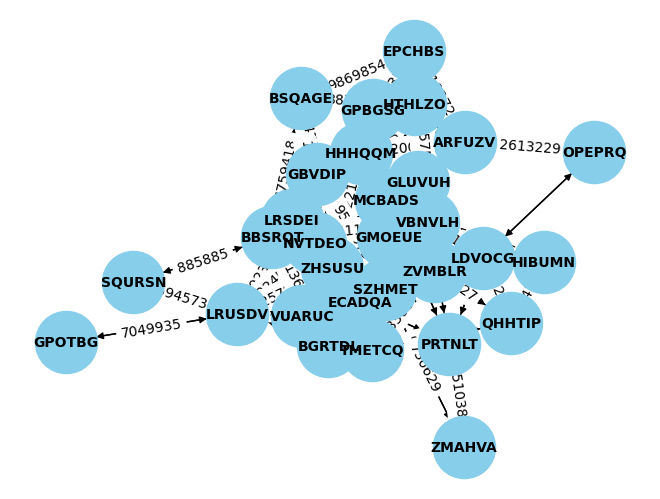

In [29]:
nodes.reset_index(inplace=True)
G = nx.DiGraph()

# Add nodes to the graph
for _, node in nodes.iterrows():
    G.add_node(node['pub_key'], alias=node['alias'])

# Add edges to the graph
for _, edge in channels.iterrows():
    G.add_edge(edge['node1_pub'], edge['node2_pub'], capacity=edge['capacity'], base_fee=edge['base_fee'], perc_fee=edge['rate_fee'])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

# Add edge labels
edge_labels = {(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network Graph')
plt.show()
nodes.set_index("pub_key", inplace=True)

In [ ]:
model = pyo.ConcreteModel(name="Min cost flow problem")
model.NODES = pyo.Set(initialize=nodes.index)
#model.CHANNELS = pyo.Set(initialize=channels.index)
model.CHANNELS = pyo.Set(initialize=[(channels.loc[i, "node1_pub"], channels.loc[i, "node2_pub"]) for i in channels.index])

In [ ]:
model.a = pyo.Var(model.CHANNELS, domain=pyo.NonNegativeReals)

In [ ]:
channels.reset_index(inplace=True)
channels.set_index(["node1_pub", "node2_pub"], inplace=True)
channels.sort_index(inplace=True)

In [ ]:
def objective_function(model: pyo.ConcreteModel):
    return sum(model.a[i] * channels.loc[i, "rate_fee"] for i in model.CHANNELS)

model.totalCost = pyo.Objective(rule=objective_function(model), sense=pyo.minimize)

In [ ]:
def capacity_constraint(model: pyo.ConcreteModel, a, b):
    return model.a[(a, b)] <=  channels.loc[(a, b), "capacity"]      # * model.x[a]

model.CapacityConstraint = pyo.Constraint(model.CHANNELS, rule=capacity_constraint, name="Capacity constraint")

In [ ]:
def create_demand(pd_object: pd.DataFrame) -> pd.DataFrame:
    """
    This function assigns the role of sender and receiver to
    two random nodes in the network
    :param pd_object: nodes dataframe
    :return: nodes dataset with demand column
    """
    random.seed(874631)
    counterparties = sample(pd_object.index.to_list(), 2)
    sender = counterparties[0]
    receiver = counterparties[1]
    # Amounts in millisat (aka 10'000'000 is 10'000 sats)
    amount = 100000 #random.randint(a=10000000, b=30000000)

    print(
        f"Transaction of {amount} sats from {pd_object[pd_object.index == sender]['alias'].item()} to {pd_object[pd_object.index == receiver]['alias'].item()}.")

    pd_object["demand"] = 0
    pd_object.loc[pd_object.index == sender, "demand"] = -amount
    pd_object.loc[pd_object.index == receiver, "demand"] = amount

    return pd_object

In [ ]:
nodes = create_demand(nodes)

In [ ]:
#channels.reset_index(inplace=True)
#channels.set_index("channel_id", inplace=True)
#for n in nodes.index:
#    for c in nodes.loc[n, "incoming_channels"]:
#        node1, node2 = channels.loc[c, "node1_pub"], channels.loc[c, "node2_pub"]
#        print(node1, node2)
#
#channels.reset_index(inplace=True)
#channels.set_index(["node1_pub", "node2_pub"], inplace=True)
#channels.sort_index(inplace=True)        

In [ ]:
channels.reset_index(inplace=True)
channels.set_index("channel_id", inplace=True)

def flow_balance_constraint(model: pyo.ConcreteModel, n: str):
    return sum(model.a[(channels.loc[a, "node1_pub"], channels.loc[a, "node2_pub"])] for a in nodes.loc[n, 'incoming_channels']) - sum(model.a[(channels.loc[a, "node1_pub"], channels.loc[a, "node2_pub"])] for a in nodes.loc[n, 'outgoing_channels']) == nodes.loc[n, "demand"]

model.FlowBalanceConstraint = pyo.Constraint(model.NODES, rule=flow_balance_constraint, name="Flow balance constrain")

channels.reset_index(inplace=True)
channels.set_index(["node1_pub", "node2_pub"], inplace=True)
channels.sort_index(inplace=True)        

In [ ]:
opt = pyo.SolverFactory('cbc')
results = opt.solve(model, tee=True)

if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    print('\nOptimal solution found')
elif results.solver.termination_condition == pyo.TerminationCondition.feasible:
    print('\nFeasible but not proven optimal solution found')
elif results.solver.termination_condition == pyo.TerminationCondition.infeasible:
    raise Exception("The model is infeasible")
else:
    print('\nSolver Status: ',  results.solver.status)
    raise Exception(results.solver.status)

print('\nObject function value = ', model.Objective())



In [ ]:
ris = []
for i,v in model.a.extract_values().items():
    if v != 0:
        ris.append((i, v))

print(ris)
